# Predicting AAPL stock price

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [4]:
# Collect and clean the data
df = pd.read_csv('AAPL.csv')
df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-01,161.009995,163.589996,160.889999,161.509995,160.551315,67829400
1,2022-08-02,160.100006,162.410004,159.630005,160.009995,159.060211,59907000
2,2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500
3,2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100
4,2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000
...,...,...,...,...,...,...,...
245,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
246,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
247,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
248,2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2023-05-17'),
  Text(0.0, 0, '2022-08-01'),
  Text(50.0, 0, '2022-10-11'),
  Text(100.0, 0, '2022-12-21'),
  Text(150.0, 0, '2023-03-07'),
  Text(200.0, 0, '2023-05-17'),
  Text(250.0, 0, ''),
  Text(300.0, 0, '')])

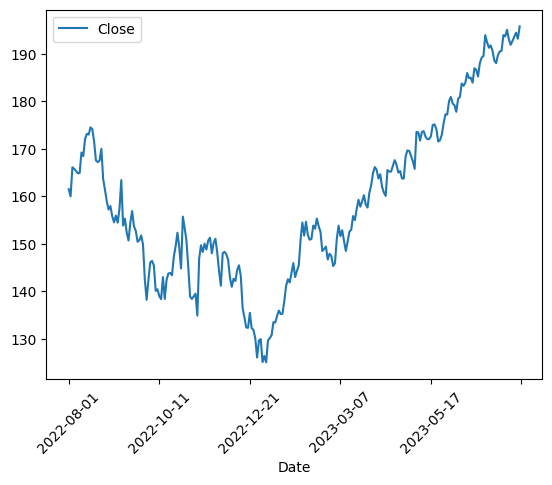

In [6]:
# Visualize the data

df.plot(x="Date", y="Close")
plt.xticks(rotation = 45)

In [7]:
# Create the model
model = RandomForestRegressor()

In [11]:
# Train the model to predict 'Close' price having all other data:
X = df[['Open', 'High', 'Low', 'Volume']]
X = X[:(len(df)-1)]
y = df['Close']
y = y[:(len(df)-1)]
model.fit(X,y)  # Training the model

RandomForestRegressor()

In [12]:
# Test the model
predictions = model.predict(X)
print('The model score is: ', model.score(X,y))

The model score is:  0.9989915084068512


In [14]:
# Make the prediction of the last row (last day stock Close price):

new_data = df[['Open', 'High', 'Low', 'Volume']].tail(1)   # last day data
prediction = model.predict(new_data)
print('The model predicts the last day close price is: ', prediction)
print('Actual close price is: ', df[['Close']].tail(1).values[0][0])

The model predicts the last day close price is:  [193.6637016]
Actual close price is:  195.830002
